In [32]:
import torch
import time

from matplotlib import pyplot as plt
from marl_env.trainer import DeepQTrainer
from marl_env.environment import MultiAgentEnvironment

%matplotlib inline

Indicate what agents you want to participate in the market by providing an agent dictionary

In [33]:
agent_dict = {
    'sellers': {
        1: {
            'type': 'ConstAgent',
            'reservation': 10,
            'multiplicity': 1,
            **{'const_price': 12},
        },
    },
    'buyers': {
        1: {
            'type': 'DQNAgent',
            'reservation': 30,
            'multiplicity': 1,
            **{'lr': 0.005,}
        },
    }
}

Now initialize your environment. Agents are provided via the agent dictionary.
Market setting, Information setting, Exploration setting and Reward setting can be optionally provided via a string.
Additional parameters fine tuning the above settings can be provided as a keyword arguments dictionary --> kwargs

In [34]:
kwargs = {
    'market_settings': {},
    'info_settings': {},
    'exploration_settings': {},
    'reward_settings': {'no_deal_max': 1}
}

env = MultiAgentEnvironment(
    agent_dict,
    'MarketMatchHiLo',
    'BlackBoxSetting',
    'LinearExplorationDecline',
    'NoDealPenaltyReward',
    **kwargs
)

Now set all training parameters and initialize the trainer.
--> Training parameters are not yet fine tuned...

In [35]:
n_episodes = 100000
batch_size = 32
mem_size = 10000
start_size = 500

trainer = DeepQTrainer(env, mem_size, start_size)

We can train the agents by making use of the trainer.train(...) methode.
Training for 100'000 games will take approx. 30 minutes. (Jupyter is somehow slow...)

In [36]:
tt = time.time()
total_loss, total_rew, actions = trainer.train(n_episodes, batch_size)
print("Total time in s: ", time.time() - tt)

tot_loss = torch.stack(total_loss, dim=0).transpose(0, 1).detach()
tot_rew = torch.stack(total_rew, dim=0).squeeze().transpose(0, 1).detach()
actions = torch.stack(actions, dim=0).transpose(0,1).detach()

Total time in s:  2241.442587852478


Let's see what the agent has learned...

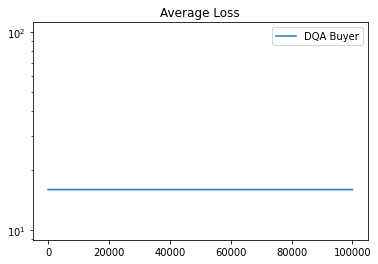

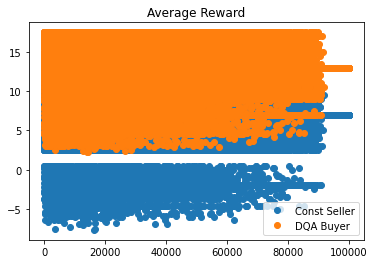

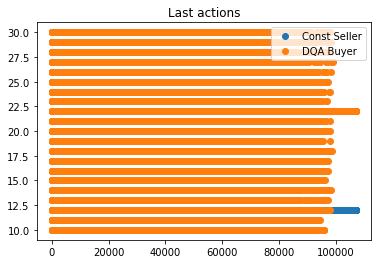

In [37]:
plt.figure()
plt.title("Average Loss")
plt.semilogy(tot_loss[1, :], label="DQA Buyer")
plt.legend()
plt.show()

plt.figure()
plt.title("Average Reward")
plt.plot(tot_rew[0, :], 'o', label="Const Seller")
plt.plot(tot_rew[1, :], 'o', label="DQA Buyer")
plt.legend()
plt.show()

plt.figure()
plt.title("Last actions")
plt.plot(actions[0, :], 'o', label="Const Seller")
plt.plot(actions[1, :], 'o', label="DQA Buyer")
plt.legend()
plt.show()